In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./data/processed_sa_bert_price_diff.csv', index_col=[0])
df

,positive,negative,neutral,none,count,known,to_predict
Date,,,,,,,
2018-01-03,22,11,1,0,34,0.37,-0.190000
2018-01-04,24,8,4,0,36,-0.19,-0.040000
2018-01-05,21,5,2,0,28,-0.04,0.010000
2018-01-08,24,1,1,0,26,0.01,-0.140000
2018-01-09,25,8,5,0,38,-0.14,-0.140000
...,...,...,...,...,...,...,...
2018-05-24,14,5,3,0,22,-0.17,-0.040000
2018-05-25,14,3,1,0,18,-0.04,0.120000
2018-05-29,20,5,2,0,27,0.12,0.010000


In [7]:
def sa_movement_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    df = pd.read_csv('./data/processed_sa_bert_price_diff.csv', index_col=[0])
    df['to_predict'] = df['to_predict'].apply(lambda x:_map(x))
    return df
# plt.plot(sa_movement_df()['to_predict'])
sa_movement_df()

,positive,negative,neutral,none,count,known,to_predict
Date,,,,,,,
2018-01-03,22,11,1,0,34,0.37,-1
2018-01-04,24,8,4,0,36,-0.19,-1
2018-01-05,21,5,2,0,28,-0.04,1
2018-01-08,24,1,1,0,26,0.01,-1
2018-01-09,25,8,5,0,38,-0.14,-1
...,...,...,...,...,...,...,...
2018-05-24,14,5,3,0,22,-0.17,-1
2018-05-25,14,3,1,0,18,-0.04,1
2018-05-29,20,5,2,0,27,0.12,1


In [8]:
def absa_movement_df():
    def _map(val):
        if val <= 0: # 0 就是亏了，还有手续费等等，简化模型为binary classification
            return -1
        else:
            return 1
    absa_df = pd.read_csv('./data/processed_absa_price_diff.csv')

#     absa_df = absa_df.drop(columns=['Date'])
#     print(absa_df.columns[:-3])
    for col in absa_df.columns[:-3]:
        if col == 'Date':
            continue
        absa_df[col] /= absa_df['count']
    absa_df = absa_df.drop(columns=['count'])
    absa_df['to_predict'] = absa_df['to_predict'].apply(lambda x:_map(x))
    return absa_df
absa_movement_df()

,Date,quality_positive,quality_negative,quality_neutral,quality_none,connectivity_positive,connectivity_negative,connectivity_neutral,connectivity_none,usability_positive,...,design features_positive,design features_negative,design features_neutral,design features_none,price_positive,price_negative,price_neutral,price_none,known,to_predict
0,2018-01-03,0.147059,0.117647,0.0,0.735294,0.0,0.0,0.0,1.0,0.058824,...,0.264706,0.029412,0.0,0.705882,0.088235,0.000000,0.0,0.911765,0.37,-1
1,2018-01-04,0.250000,0.111111,0.0,0.638889,0.0,0.0,0.0,1.0,0.055556,...,0.166667,0.083333,0.0,0.750000,0.055556,0.000000,0.0,0.944444,-0.19,-1
2,2018-01-05,0.285714,0.035714,0.0,0.678571,0.0,0.0,0.0,1.0,0.035714,...,0.178571,0.000000,0.0,0.821429,0.107143,0.000000,0.0,0.892857,-0.04,1
3,2018-01-08,0.307692,0.000000,0.0,0.692308,0.0,0.0,0.0,1.0,0.038462,...,0.269231,0.000000,0.0,0.730769,0.115385,0.000000,0.0,0.884615,0.01,-1
4,2018-01-09,0.210526,0.078947,0.0,0.710526,0.0,0.0,0.0,1.0,0.052632,...,0.184211,0.078947,0.0,0.736842,0.105263,0.000000,0.0,0.894737,-0.14,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018-05-24,0.318182,0.136364,0.0,0.545455,0.0,0.0,0.0,1.0,0.045455,...,0.136364,0.000000,0.0,0.863636,0.227273,0.000000,0.0,0.772727,-0.17,-1
99,2018-05-25,0.277778,0.000000,0.0,0.722222,0.0,0.0,0.0,1.0,0.055556,...,0.055556,0.000000,0.0,0.944444,0.277778,0.000000,0.0,0.722222,-0.04,1
100,2018-05-29,0.222222,0.037037,0.0,0.740741,0.0,0.0,0.0,1.0,0.037037,...,0.148148,0.037037,0.0,0.814815,0.074074,0.037037,0.0,0.888889,0.12,1
101,2018-05-30,0.379310,0.068966,0.0,0.551724,0.0,0.0,0.0,1.0,0.034483,...,0.137931,0.137931,0.0,0.724138,0.068966,0.034483,0.0,0.896552,0.01,-1


In [40]:
def absa_movement_no_known_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    absa_df = pd.read_csv('./data/processed_absa_price_diff.csv')

#     absa_df = absa_df.drop(columns=['Date'])
#     print(absa_df.columns[:-3])
    for col in absa_df.columns[:-3]:
        if col == 'Date':
            continue
        absa_df[col] /= absa_df['count']
    absa_df = absa_df.drop(columns=['count','known'])
    absa_df['to_predict'] = absa_df['to_predict'].apply(lambda x:_map(x))
    
    return absa_df
absa_movement_no_known_df()

,Date,quality_positive,quality_negative,quality_neutral,quality_none,connectivity_positive,connectivity_negative,connectivity_neutral,connectivity_none,usability_positive,...,operation performance_none,design features_positive,design features_negative,design features_neutral,design features_none,price_positive,price_negative,price_neutral,price_none,to_predict
0,2018-01-03,0.147059,0.117647,0.0,0.735294,0.0,0.0,0.0,1.0,0.058824,...,0.735294,0.264706,0.029412,0.0,0.705882,0.088235,0.000000,0.0,0.911765,-1
1,2018-01-04,0.250000,0.111111,0.0,0.638889,0.0,0.0,0.0,1.0,0.055556,...,0.750000,0.166667,0.083333,0.0,0.750000,0.055556,0.000000,0.0,0.944444,-1
2,2018-01-05,0.285714,0.035714,0.0,0.678571,0.0,0.0,0.0,1.0,0.035714,...,0.785714,0.178571,0.000000,0.0,0.821429,0.107143,0.000000,0.0,0.892857,1
3,2018-01-08,0.307692,0.000000,0.0,0.692308,0.0,0.0,0.0,1.0,0.038462,...,0.692308,0.269231,0.000000,0.0,0.730769,0.115385,0.000000,0.0,0.884615,-1
4,2018-01-09,0.210526,0.078947,0.0,0.710526,0.0,0.0,0.0,1.0,0.052632,...,0.815789,0.184211,0.078947,0.0,0.736842,0.105263,0.000000,0.0,0.894737,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018-05-24,0.318182,0.136364,0.0,0.545455,0.0,0.0,0.0,1.0,0.045455,...,0.636364,0.136364,0.000000,0.0,0.863636,0.227273,0.000000,0.0,0.772727,-1
99,2018-05-25,0.277778,0.000000,0.0,0.722222,0.0,0.0,0.0,1.0,0.055556,...,0.777778,0.055556,0.000000,0.0,0.944444,0.277778,0.000000,0.0,0.722222,1
100,2018-05-29,0.222222,0.037037,0.0,0.740741,0.0,0.0,0.0,1.0,0.037037,...,0.740741,0.148148,0.037037,0.0,0.814815,0.074074,0.037037,0.0,0.888889,1
101,2018-05-30,0.379310,0.068966,0.0,0.551724,0.0,0.0,0.0,1.0,0.034483,...,0.689655,0.137931,0.137931,0.0,0.724138,0.068966,0.034483,0.0,0.896552,-1


In [10]:
def pure_movement_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    df = pd.read_csv('./data/processed_sa_bert_price_diff.csv')
    df = df[['Date','known','to_predict']]
    df['to_predict'] = df['to_predict'].apply(lambda x:_map(x))
    return df
pure_movement_df()

,Date,known,to_predict
0,2018-01-03,0.37,-1
1,2018-01-04,-0.19,-1
2,2018-01-05,-0.04,1
3,2018-01-08,0.01,-1
4,2018-01-09,-0.14,-1
...,...,...,...
98,2018-05-24,-0.17,-1
99,2018-05-25,-0.04,1
100,2018-05-29,0.12,1
101,2018-05-30,0.01,-1


# generalized linear model

## pure stock price

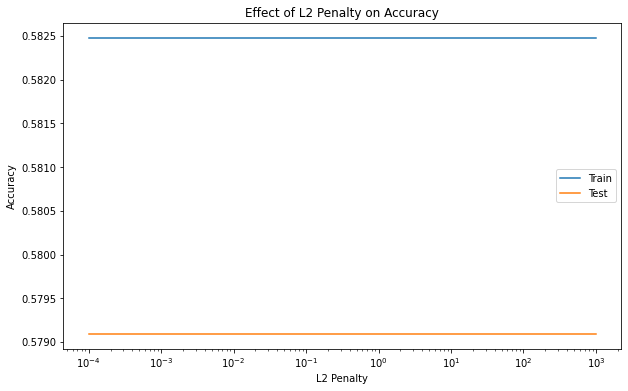

Best L2 Penalty: 0.0001
Train Accuracy: 0.5825242718446602
Test Accuracy: 0.5790909090909092
Confusion Matrix:
[[60.  0.]
 [43.  0.]]


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold

# Load the data
df = pure_movement_df()

# Split the data into predictor variables and target variable
X = df.drop(['to_predict', 'Date'], axis=1).values
y = df['to_predict'].values

# Normalize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the range of l2 penalties to test
penalties = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize empty lists to store the results
train_accs = []
test_accs = []

# Loop through each l2 penalty and run the cross validation
for penalty in penalties:
    train_acc_folds = []
    test_acc_folds = []
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X_scaled):
        # Split the data into train and test sets
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the logistic regression model with the current l2 penalty
        lr = LogisticRegression(penalty='l2', C=1/penalty, max_iter=10000)
        lr.fit(X_train, y_train)

        # Make predictions on the train and test sets
        train_preds = lr.predict(X_train)
        test_preds = lr.predict(X_test)

        # Calculate the accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)

        # Save the accuracy scores for this fold
        train_acc_folds.append(train_acc)
        test_acc_folds.append(test_acc)

    # Calculate the mean accuracy scores across all folds for this l2 penalty
    train_acc_mean = np.mean(train_acc_folds)
    test_acc_mean = np.mean(test_acc_folds)

    # Save the mean accuracy scores for this l2 penalty
    train_accs.append(train_acc_mean)
    test_accs.append(test_acc_mean)

# Plot the effect of different l2 penalties on the accuracy
plt.figure(figsize=(10,6))
plt.plot(penalties, train_accs, label='Train')
plt.plot(penalties, test_accs, label='Test')
plt.xscale('log')
plt.xlabel('L2 Penalty')
plt.ylabel('Accuracy')
plt.title('Effect of L2 Penalty on Accuracy')
plt.legend()
plt.show()

# Print the best train accuracy, test accuracy, and confusion matrix for the best l2 penalty
best_penalty = penalties[np.argmax(test_accs)]
lr = LogisticRegression(penalty='l2', C=1/best_penalty, max_iter=10000)
lr.fit(X_scaled, y)
train_preds = lr.predict(X_scaled)
train_accuracy = accuracy_score(y, train_preds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_acc_folds = []
conf_mat = np.zeros((2,2))
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the logistic regression model with the best l2 penalty on the train data
    lr.fit(X_train, y_train)

    # Make predictions on the test set
    test_preds = lr.predict(X_test)

    # Calculate the accuracy scores and confusion matrix
    test_acc = accuracy_score(y_test, test_preds)
    test_acc_folds.append(test_acc)
    conf_mat += confusion_matrix(y_test, test_preds)
    
    test_accuracy = np.mean(test_acc_folds)

print('Best L2 Penalty:', best_penalty)
print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)
print('Confusion Matrix:')
print(conf_mat)


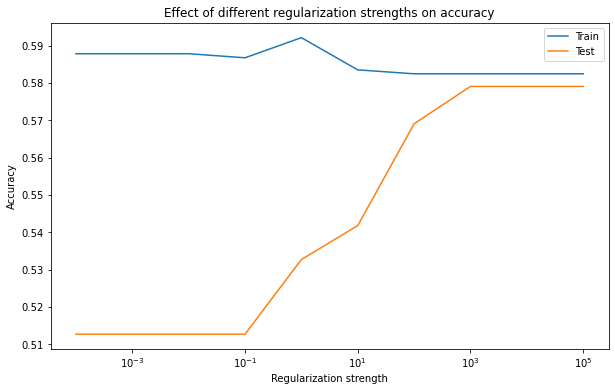

Best regularization strength: 1000
Train accuracy: 0.5825242718446602
Test accuracy: 0.5790909090909092
Confusion matrix:
[[0.57457548 0.        ]
 [0.53653564 0.        ]]


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = sa_movement_df()

# Extract the features and target
X = df.drop(['to_predict'], axis=1)
y = df['to_predict']

# Set up the K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up the regularization strengths to test
penalties = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]

# Initialize empty lists to store the results
train_accs = []
test_accs = []

# Loop through each regularization strength and run the cross validation
for penalty in penalties:
    train_acc_folds = []
    test_acc_folds = []
    for train_index, test_index in kf.split(X):
        # Split the data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the logistic regression model with the current regularization strength
        lr = LogisticRegression(penalty='l2', C=1/penalty, max_iter=10000)
        lr.fit(X_train, y_train)

        # Make predictions on the train and test sets
        train_preds = lr.predict(X_train)
        test_preds = lr.predict(X_test)

        # Calculate the accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)

        # Save the accuracy scores for this fold
        train_acc_folds.append(train_acc)
        test_acc_folds.append(test_acc)

    # Calculate the mean accuracy scores across all folds for this regularization strength
    train_acc_mean = np.mean(train_acc_folds)
    test_acc_mean = np.mean(test_acc_folds)

    # Save the mean accuracy scores for this regularization strength
    train_accs.append(train_acc_mean)
    test_accs.append(test_acc_mean)

# Plot the effect of different regularization strengths on the accuracy scores
plt.figure(figsize=(10,6))
plt.plot(penalties, train_accs, label='Train')
plt.plot(penalties, test_accs, label='Test')
plt.xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('Accuracy')
plt.title('Effect of different regularization strengths on accuracy')
plt.legend()
plt.show()

# Print the best train accuracy, test accuracy, and confusion matrix for the best regularization strength
best_penalty = penalties[np.argmax(test_accs)]
lr = LogisticRegression(penalty='l2', C=1/best_penalty, max_iter=10000)
lr.fit(X, y)
train_preds = lr.predict(X)
train_accuracy = accuracy_score(y, train_preds)
test_acc_folds = []
conf_mat = np.zeros((2,2))
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    test_preds = lr.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    test_acc_folds.append(test_acc)
    conf_mat += confusion_matrix(y_test, test_preds)
    conf_mat /= 10
    test_accuracy = np.mean(test_acc_folds)

print('Best regularization strength:', best_penalty)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)
print('Confusion matrix:')
print(conf_mat)

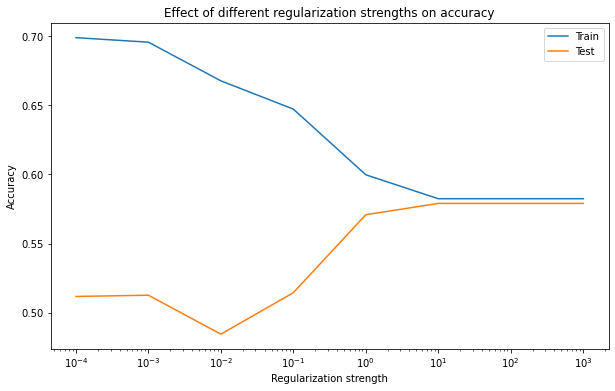

Best regularization strength: 10
Train accuracy: 0.5825242718446602
Test accuracy: 0.5790909090909092
Confusion matrix:
[[0.57457548 0.        ]
 [0.53653564 0.        ]]


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
df = absa_movement_no_known_df()

# Extract the features and target
X = df.drop(['to_predict', 'Date'], axis=1)
y = df['to_predict']

# Set up the K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Set up the regularization strengths to test
penalties = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize empty lists to store the results
train_accs = []
test_accs = []

# Loop through each regularization strength and run the cross validation
for penalty in penalties:
    train_acc_folds = []
    test_acc_folds = []
    for train_index, test_index in kf.split(X):
        # Split the data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the logistic regression model with the current regularization strength
        lr = LogisticRegression(penalty='l2', C=1/penalty, max_iter=10000)
        lr.fit(X_train, y_train)

        # Make predictions on the train and test sets
        train_preds = lr.predict(X_train)
        test_preds = lr.predict(X_test)

        # Calculate the accuracy scores
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)

        # Save the accuracy scores for this fold
        train_acc_folds.append(train_acc)
        test_acc_folds.append(test_acc)

    # Calculate the mean accuracy scores across all folds for this regularization strength
    train_acc_mean = np.mean(train_acc_folds)
    test_acc_mean = np.mean(test_acc_folds)

    # Save the mean accuracy scores for this regularization strength
    train_accs.append(train_acc_mean)
    test_accs.append(test_acc_mean)

# Plot the effect of different regularization strengths on the accuracy scores
plt.figure(figsize=(10,6))
plt.plot(penalties, train_accs, label='Train')
plt.plot(penalties, test_accs, label='Test')
plt.xscale('log')
plt.xlabel('Regularization strength')
plt.ylabel('Accuracy')
plt.title('Effect of different regularization strengths on accuracy')
plt.legend()
plt.show()

# Print the best train accuracy, test accuracy, and confusion matrix for the best regularization strength
best_penalty = penalties[np.argmax(test_accs)]
lr = LogisticRegression(penalty='l2', C=1/best_penalty, max_iter=10000)
lr.fit(X, y)
train_preds = lr.predict(X)
train_accuracy = accuracy_score(y, train_preds)
test_acc_folds = []
conf_mat = np.zeros((2,2))
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train, y_train)
    test_preds = lr.predict(X_test)
    test_acc = accuracy_score(y_test, test_preds)
    test_acc_folds.append(test_acc)
    conf_mat += confusion_matrix(y_test, test_preds)
    conf_mat /= 10
    test_accuracy = np.mean(test_acc_folds)

print('Best regularization strength:', best_penalty)
print('Train accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)
print('Confusion matrix:')
print(conf_mat)

## Multi_layer Perceptron

In [9]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

# Load the dataset
df = absa_movement_no_known_df()

# Extract the features and target
X = df.drop(['to_predict', 'Date'], axis=1)
y = df['to_predict']

# Set up the K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the range of number of hidden units to test
hidden_units_range = range(5, 31)

# Initialize empty lists to store the results
train_accs = []
test_accs = []
conf_mats = []

# Loop through each number of hidden units and run the cross validation
for hidden_units in tqdm(hidden_units_range):
    train_acc_folds = []
    test_acc_folds = []
    conf_mat_folds = []
    for train_index, test_index in kf.split(X):
        # Split the data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the MLP model with the current number of hidden units
        mlp = MLPClassifier(hidden_layer_sizes=(hidden_units,), max_iter=10000, random_state=42)
        mlp.fit(X_train, y_train)

        # Make predictions on the train and test sets
        train_preds = mlp.predict(X_train)
        test_preds = mlp.predict(X_test)

        # Calculate the accuracy scores and confusion matrix
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)
        conf_mat = confusion_matrix(y_test, test_preds)

        # Save the accuracy scores and confusion matrix for this fold
        train_acc_folds.append(train_acc)
        test_acc_folds.append(test_acc)
        conf_mat_folds.append(conf_mat)

    # Calculate the mean accuracy scores and confusion matrix across all folds for this number of hidden units
    train_acc_mean = np.mean(train_acc_folds)
    test_acc_mean = np.mean(test_acc_folds)
    conf_mat_mean = np.mean(conf_mat_folds, axis=0)

    # Save the mean accuracy scores and confusion matrix for this number of hidden units
    train_accs.append(train_acc_mean)
    test_accs.append(test_acc_mean)
    conf_mats.append(conf_mat_mean)

# Find the number of hidden units with the best test accuracy
best_idx = np.argmax(test_accs)
best_hidden_units = hidden_units_range[best_idx]

# Train the MLP model with the best number of hidden units using the entire dataset
mlp = MLPClassifier(hidden_layer_sizes=(best_hidden_units,), max_iter=10000, random_state=42)
mlp.fit(X, y)
preds = mlp.predict(X)
train_accuracy = accuracy_score(y, preds)
conf_mat = confusion_matrix(y, preds)

# Print the results
print('Best number of hidden units:', best_hidden_units)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accs[best_idx])
print('Confusion matrix:')
print(conf_mat)


100%|██████████| 26/26 [01:17<00:00,  2.96s/it]

Best number of hidden units: 6
Training accuracy: 0.5825242718446602
Test accuracy: 0.5790909090909092
Confusion matrix:
[[60  0]
 [43  0]]


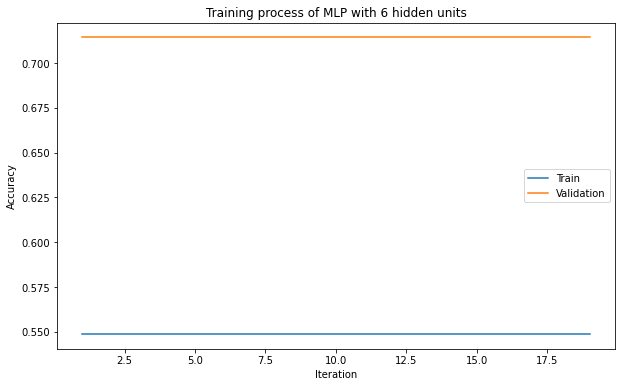

train accu: 0.5487804878048781
 val accu: 0.7142857142857143


In [37]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pure_movement_df()

# Extract the features and target
X = df.drop(['to_predict', 'Date'], axis=1)
y = df['to_predict']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train an MLP with 6 hidden units
mlp = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)

# Train the MLP on the training data and record the validation accuracy at each iteration
train_accs = []
val_accs = []
for i in range(1, 20):
    mlp.partial_fit(X_train, y_train, classes=[-1, 1])
    train_preds = mlp.predict(X_train)
    val_preds = mlp.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracy as a function of the number of iterations
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), train_accs, label='Train')
plt.plot(range(1, 20), val_accs, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training process of MLP with 6 hidden units')
plt.legend()
plt.show()

print('train accu: {}\n val accu: {}'.format(train_accs[-1], val_accs[-1]))

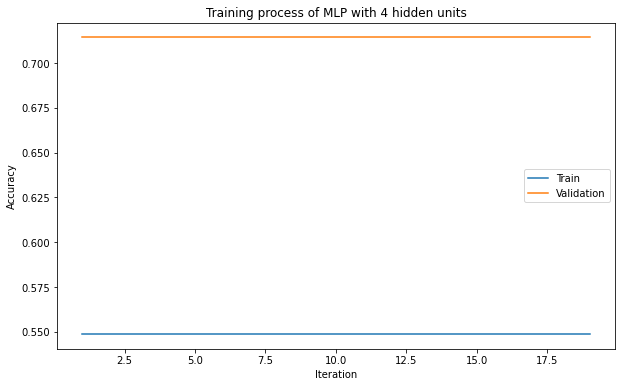

train accu: 0.5487804878048781
 val accu: 0.7142857142857143


In [28]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = sa_movement_df()

# Extract the features and target
X = df.drop(['to_predict'], axis=1)
y = df['to_predict']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train an MLP with 6 hidden units
mlp = MLPClassifier(hidden_layer_sizes=(4,), max_iter=10000, random_state=42)

# Train the MLP on the training data and record the validation accuracy at each iteration
train_accs = []
val_accs = []
for i in range(1, 20):
    mlp.partial_fit(X_train, y_train, classes=[-1, 1])
    train_preds = mlp.predict(X_train)
    val_preds = mlp.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracy as a function of the number of iterations
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), train_accs, label='Train')
plt.plot(range(1, 20), val_accs, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training process of MLP with 4 hidden units')
plt.legend()
plt.show()

print('train accu: {}\n val accu: {}'.format(train_accs[-1], val_accs[-1]))

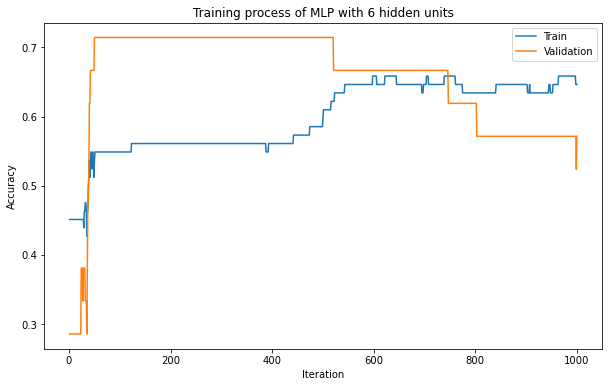

In [80]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = absa_movement_no_known_df()

# Extract the features and target
X = df.drop(['to_predict', 'Date'], axis=1)
y = df['to_predict']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train an MLP with 6 hidden units
mlp = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)

# Train the MLP on the training data and record the validation accuracy at each iteration
train_accs = []
val_accs = []
for i in range(1, 1001):
    mlp.partial_fit(X_train, y_train, classes=[-1, 1])
    train_preds = mlp.predict(X_train)
    val_preds = mlp.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracy as a function of the number of iterations
plt.figure(figsize=(10,6))
plt.plot(range(1, 1001), train_accs, label='Train')
plt.plot(range(1, 1001), val_accs, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training process of MLP with 6 hidden units')
plt.legend()
plt.show()


In [47]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm

# Load the dataset
df = sa_movement_df()

# Extract the features and target
X = df.drop(['to_predict'], axis=1)
y = df['to_predict']

# Set up the K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define the range of number of hidden units to test
hidden_units_range = range(5, 31)

# Initialize empty lists to store the results
train_accs = []
test_accs = []
conf_mats = []

# Loop through each number of hidden units and run the cross validation
for hidden_units in tqdm(hidden_units_range):
    train_acc_folds = []
    test_acc_folds = []
    conf_mat_folds = []
    for train_index, test_index in kf.split(X):
        # Split the data into train and test sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the MLP model with the current number of hidden units
        mlp = MLPClassifier(hidden_layer_sizes=(hidden_units,), max_iter=10000, random_state=42)
        mlp.fit(X_train, y_train)

        # Make predictions on the train and test sets
        train_preds = mlp.predict(X_train)
        test_preds = mlp.predict(X_test)

        # Calculate the accuracy scores and confusion matrix
        train_acc = accuracy_score(y_train, train_preds)
        test_acc = accuracy_score(y_test, test_preds)
        conf_mat = confusion_matrix(y_test, test_preds)

        # Save the accuracy scores and confusion matrix for this fold
        train_acc_folds.append(train_acc)
        test_acc_folds.append(test_acc)
        conf_mat_folds.append(conf_mat)

    # Calculate the mean accuracy scores and confusion matrix across all folds for this number of hidden units
    train_acc_mean = np.mean(train_acc_folds)
    test_acc_mean = np.mean(test_acc_folds)
    conf_mat_mean = np.mean(conf_mat_folds, axis=0)

    # Save the mean accuracy scores and confusion matrix for this number of hidden units
    train_accs.append(train_acc_mean)
    test_accs.append(test_acc_mean)
    conf_mats.append(conf_mat_mean)

# Find the number of hidden units with the best test accuracy
best_idx = np.argmax(test_accs)
best_hidden_units = hidden_units_range[best_idx]

# Train the MLP model with the best number of hidden units using the entire dataset
mlp = MLPClassifier(hidden_layer_sizes=(best_hidden_units,), max_iter=10000, random_state=42)
mlp.fit(X, y)
preds = mlp.predict(X)
train_accuracy = accuracy_score(y, preds)
conf_mat = confusion_matrix(y, preds)

# Print the results
print('Best number of hidden units:', best_hidden_units)
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accs[best_idx])
print('Confusion matrix:')
print(conf_mat)


100%|██████████| 26/26 [00:16<00:00,  1.57it/s]

Best number of hidden units: 27
Training accuracy: 0.6310679611650486
Test accuracy: 0.6090909090909091
Confusion matrix:
[[47 13]
 [25 18]]


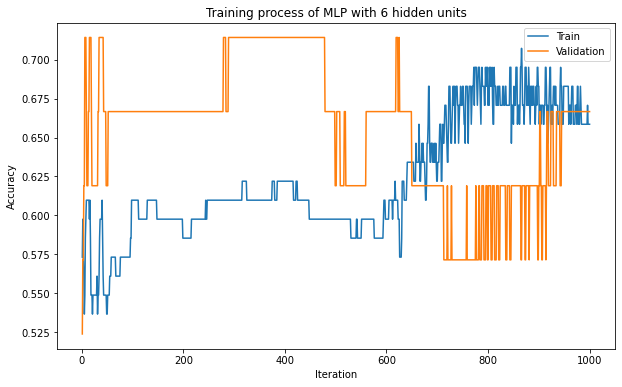

In [51]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = sa_movement_df()

# Extract the features and target
X = df.drop(['to_predict'], axis=1)
y = df['to_predict']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an MLP with 6 hidden units
mlp = MLPClassifier(hidden_layer_sizes=(27,), max_iter=10000, random_state=42)

# Train the MLP on the training data and record the validation accuracy at each iteration
train_accs = []
val_accs = []
for i in range(1, 1001):
    mlp.partial_fit(X_train, y_train, classes=[-1, 1])
    train_preds = mlp.predict(X_train)
    val_preds = mlp.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracy as a function of the number of iterations
plt.figure(figsize=(10,6))
plt.plot(range(1, 1001), train_accs, label='Train')
plt.plot(range(1, 1001), val_accs, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training process of MLP with 6 hidden units')
plt.legend()
plt.show()


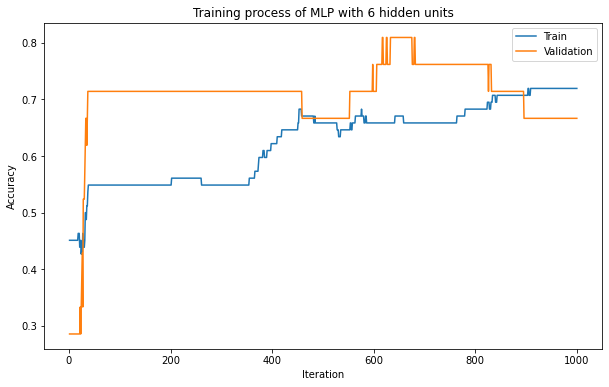

In [42]:
def best_absa_movement_no_known_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    absa_df = pd.read_csv('./data/best_processed_absa_price_diff.csv')

#     absa_df = absa_df.drop(columns=['Date'])
#     print(absa_df.columns[:-3])
    for col in absa_df.columns[:-3]:
        if col == 'Date':
            continue
        absa_df[col] /= absa_df['count']
    absa_df = absa_df.drop(columns=['count','known'])
    absa_df['to_predict'] = absa_df['to_predict'].apply(lambda x:_map(x))
    
    return absa_df


import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = best_absa_movement_no_known_df()

# Extract the features and target
X = df.drop(['to_predict', 'Date'], axis=1)
y = df['to_predict']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train an MLP with 6 hidden units
mlp = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)

# Train the MLP on the training data and record the validation accuracy at each iteration
train_accs = []
val_accs = []
for i in range(1, 1001):
    mlp.partial_fit(X_train, y_train, classes=[-1, 1])
    train_preds = mlp.predict(X_train)
    val_preds = mlp.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracy as a function of the number of iterations
plt.figure(figsize=(10,6))
plt.plot(range(1, 1001), train_accs, label='Train')
plt.plot(range(1, 1001), val_accs, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training process of MLP with 6 hidden units')
plt.legend()
plt.show()



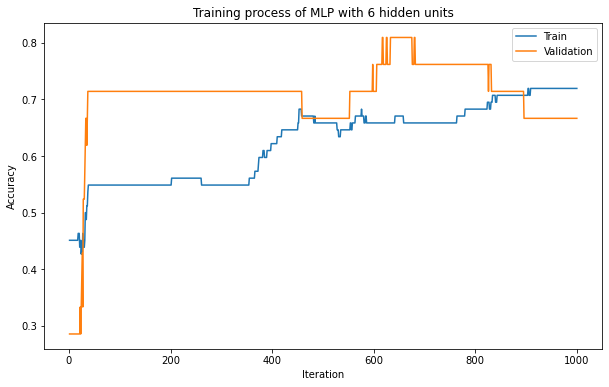

In [1]:
def best_absa_movement_no_known_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    absa_df = pd.read_csv('./data/best_processed_absa_price_diff.csv')

#     absa_df = absa_df.drop(columns=['Date'])
#     print(absa_df.columns[:-3])
    for col in absa_df.columns[:-3]:
        if col == 'Date':
            continue
        absa_df[col] /= absa_df['count']
    absa_df = absa_df.drop(columns=['count','known'])
    absa_df['to_predict'] = absa_df['to_predict'].apply(lambda x:_map(x))
    
    return absa_df


import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = best_absa_movement_no_known_df()

# Extract the features and target
X = df.drop(['to_predict', 'Date'], axis=1)
y = df['to_predict']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train an MLP with 6 hidden units
mlp = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, random_state=42)

# Train the MLP on the training data and record the validation accuracy at each iteration
train_accs = []
val_accs = []
for i in range(1, 1001):
    mlp.partial_fit(X_train, y_train, classes=[-1, 1])
    train_preds = mlp.predict(X_train)
    val_preds = mlp.predict(X_val)
    train_acc = accuracy_score(y_train, train_preds)
    val_acc = accuracy_score(y_val, val_preds)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

# Plot the training and validation accuracy as a function of the number of iterations
plt.figure(figsize=(10,6))
plt.plot(range(1, 1001), train_accs, label='Train')
plt.plot(range(1, 1001), val_accs, label='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training process of MLP with 6 hidden units')
plt.legend()
plt.show()



In [5]:
idx = 850
val_accs[idx:idx+10]

[0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]